## Load libraries

In [0]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
from collections import defaultdict

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load the Dataset

In [0]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('alldata.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


## Data Cleaning Process

### Split the location by city and state 

In [0]:
new = df["location"].str.split(", ", n = 1, expand = True) 
df["city"] = new[0]
df["state"] = new[1]

# get rid of Zip code
state = df["state"].str.split(" ", n = 1, expand = True) 
df["state"] = state[0]
df = df.drop(['location'],axis = 1)

df.head()

,position,company,description,reviews,city,state
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,Atlanta,GA
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,Atlanta,GA
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,Atlanta,GA
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,Atlanta,GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,Atlanta,GA


### Categorize job positions into 5 main types

#### Data Scientist, Data Engineer, Data Analyst, Data Science Manager and Others

In [0]:
# classify job into "machine learning" , "data scientist", "data analyst", "data engineer", "others"
data=df.copy()

for i  in range(len(data)):
    p = data.iloc[i,0]
    p = str(p)
    p = p.lower()
    if  p.find("manager") != -1 or p.find("director") != -1 or p.find("scientistsenior") != -1:
            data.loc[i,'position_type'] = 'Manager'
    elif p.find("scientist") != -1 or p.find("science") != -1 or p.find("data science")!= -1 or p.find("scientistdata") != -1:
            data.loc[i,'position_type'] = 'Data Scientist'
    elif p.find("analyst") != -1 or p.find("analytics") != -1 or p.find("intelligent") != -1 or p.find("analysis") != -1 or p.find("statistician") != -1 or p.find("analytical") != -1 or p.find("consultant") != -1 or p.find("development") != -1 or p.find("product") != -1:
            data.loc[i,'position_type'] = 'Data Analyst'
    elif p.find("engineer") != -1 or p.find("machine")!= -1 or p.find("learning")!= -1 or p.find("programmer") != -1 or p.find("developer") != -1 or p.find("principal statistical programmer") != -1:
            data.loc[i,'position_type'] = 'Data Engineer'
    else:
        data.loc[i,'position_type'] = 'Others'
        
data.head()

,position,company,description,reviews,city,state,position_type
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,Atlanta,GA,Manager
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,Atlanta,GA,Data Scientist
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,Atlanta,GA,Data Scientist
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,Atlanta,GA,Data Analyst
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,Atlanta,GA,Data Engineer


In [0]:
data.groupby('position_type').count()

,position,company,description,reviews,city,state
position_type,,,,,,
Data Analyst,1162,1162,1162,930,1162,1162
Data Engineer,1228,1228,1228,931,1228,1228
Data Scientist,2715,2715,2715,1957,2715,2715
Manager,810,810,810,653,810,810
Others,1038,1038,1038,855,1038,1038


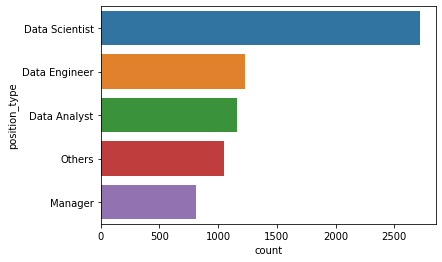

In [0]:
popular_position = data.groupby('position_type').size().sort_values(ascending =False).to_frame().reset_index()
popular_position.columns = ['position_type','count']
sns.barplot(x='count', y='position_type', data =popular_position.head(20))

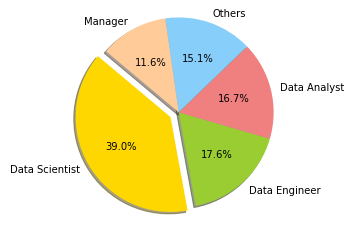

In [0]:
# Data to plot
popular_position = data.groupby('position_type').size().sort_values(ascending =False).to_frame().reset_index()
popular_position.columns = ['position_type','count']
labels = popular_position['position_type']
sizes = popular_position['count']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', '#ffcc99']
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## Exploratory Data Analysis (EDA)

In [0]:
total_no_company=df['company'].nunique()
print('Toatl number of firms with data science job vacancies =',total_no_company)

Toatl number of firms with data science job vacancies = 2213


Top 10 firms with most vacancies                                      company  position
122                               Amazon.com       358
230                           Ball Aerospace       187
1270                               Microsoft       137
866                                   Google       134
1328                      NYU Langone Health        77
798   Fred Hutchinson Cancer Research Center        70
1095                                    KPMG        66
1136                                  Lab126        50
748                                 Facebook        49
324                          Broad Institute        49
2101                       Walmart eCommerce        45
1248                      McKinsey & Company        41
1876                   Takeda Pharmaceutical        39
2040                University of Washington        39
928                                  Harnham        39
1421                                Oath Inc        34
1512        Pharmacyclics, an Ab

Text(0, 0.5, '# OF JOBS')

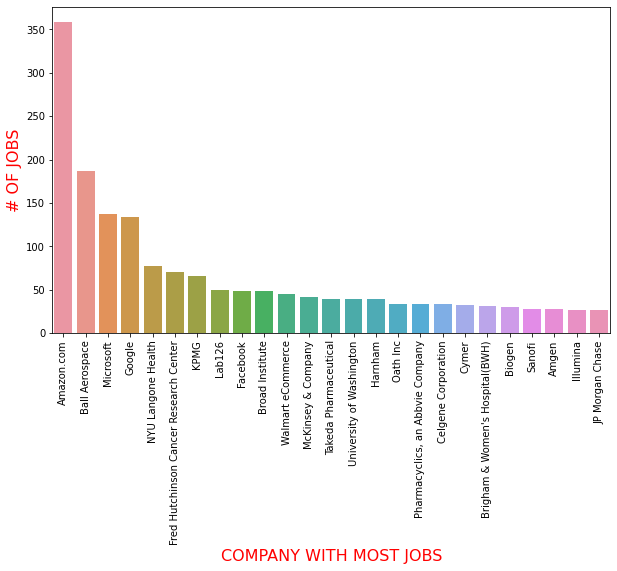

In [0]:
#finding highest number of vacancy in a company
most_vacancy= df.groupby(['company'])['position'].count()
most_vacancy=most_vacancy.reset_index(name='position')
most_vacancy=most_vacancy.sort_values(['position'],ascending=False)
pareto_df=most_vacancy
most_vacancy=most_vacancy.head(25)
print('Top 10 firms with most vacancies',most_vacancy)

# Plot graph for top most vacancy
fig, ax = plt.subplots(figsize = (10,6))
ax=sns.barplot(x="company", y="position", data=most_vacancy)    
ax.set_xticklabels(most_vacancy['company'],rotation=90)  
ax.set_xlabel('COMPANY WITH MOST JOBS',fontsize=16, color='red')
ax.set_ylabel('# OF JOBS',fontsize=16,color='red') 

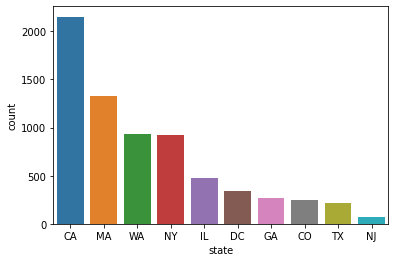

In [0]:
 sns.countplot(x="state", data=df,
                order = df['state'].value_counts().index)

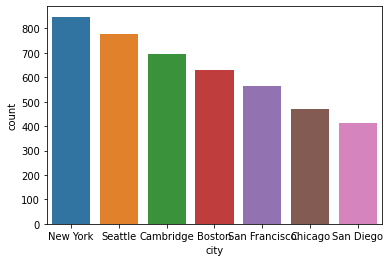

In [0]:
sns.countplot(x="city", data=df,
                order = df['city'].value_counts().head(7).index)

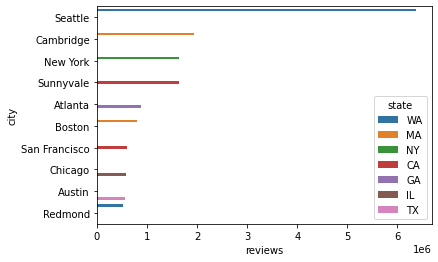

In [0]:
popularity_location = df.groupby(['state','city']).sum()
popularity_location = popularity_location.reset_index()
popularity_location = popularity_location.sort_values('reviews',ascending =False)

sns.barplot(y = 'city', x = 'reviews', data =popularity_location.head(10), hue = 'state' )

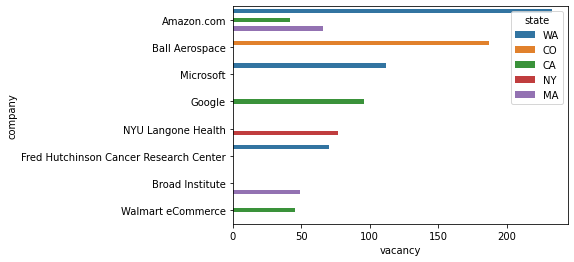

In [0]:
position_company = df.groupby(['state','company']).size().reset_index(name='vacancy').sort_values(['vacancy'],
                                                                                                       ascending =False)
position_company.head()

sns.barplot(x= 'vacancy', y='company',data =position_company.head(10), hue = 'state')

## Wordcloud for 5 job position types


### Data Scientist

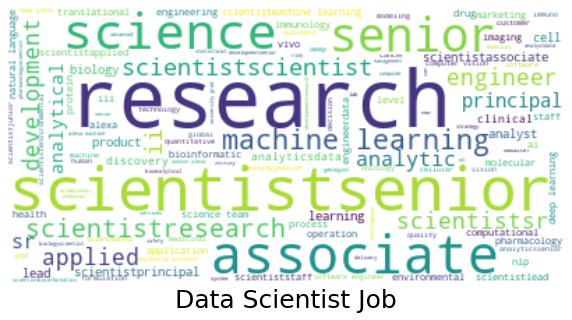

In [0]:
scientist_job  = data[data['position_type'] == 'Data Scientist']
scientist_job.head()

text = ''
for w in scientist_job['position'].str.lower():
    text = text + str(w)
stop_words = ['data','scientist', 'scientistdata'] + list(STOPWORDS)


# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Data Scientist Job", size = 25,y=-0.1)
plt.axis("off")
plt.show()

### Data Analyst

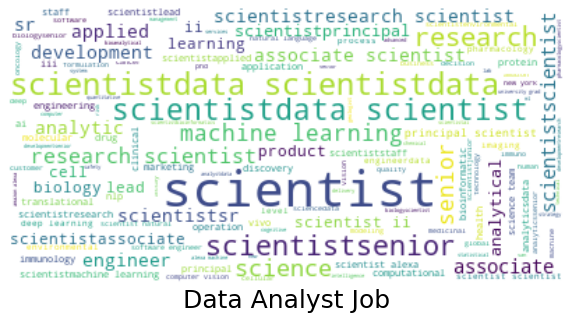

In [0]:
analyst_job = data[data['position_type'] == 'Data Analyst']
analyst_job.head()

text = ''
for w in scientist_job['position'].str.lower():
    text = text + str(w)
stop_words = ['data','analyst'] + list(STOPWORDS)


# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Data Analyst Job", size = 25,y=-0.1)
plt.axis("off")
plt.show()

### Data Engineer

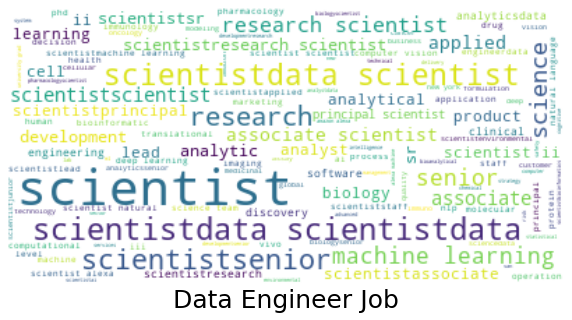

In [0]:
engineer_job  = data[data['position_type'] == 'Data Engineer']
engineer_job.head()

text = ''
for w in scientist_job['position'].str.lower():
    text = text + str(w)
stop_words = ['data','engineer'] + list(STOPWORDS)


# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Data Engineer Job", size = 25,y=-0.1)
plt.axis("off")
plt.show()

### Manager

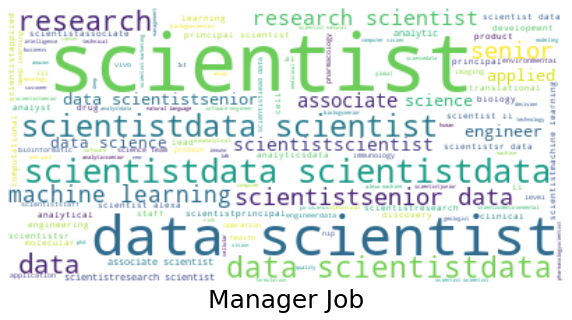

In [0]:
manager_job  = data[data['position_type'] == 'Manager']
manager_job.head()

text = ''
for w in scientist_job['position'].str.lower():
    text = text + str(w)
stop_words = ['manager', 'director'] + list(STOPWORDS)


# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Manager Job", size = 25,y=-0.1)
plt.axis("off")
plt.show()

### Others

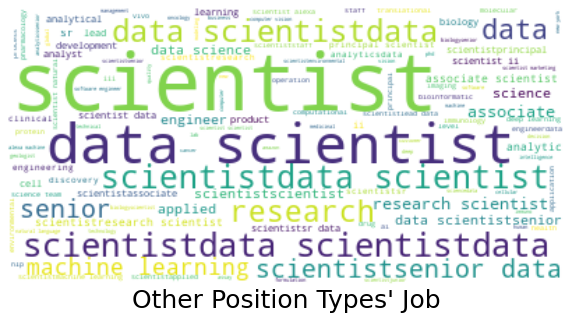

In [0]:
other_job  = data[data['position_type'] == 'Others']
other_job.head()

text = ''
for w in scientist_job['position'].str.lower():
    text = text + str(w)
stop_words = ['Others'] + list(STOPWORDS)


# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Other Position Types' Job", size = 25,y=-0.1)
plt.axis("off")
plt.show()

## Job Description Analysis

### Data Scientist

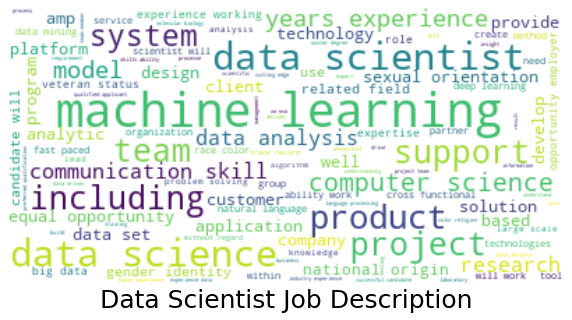

In [0]:
# scientist data job
text = ''
for w in scientist_job ['description'].str.lower():
    text = text + str(w)


# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Data Scientist Job Description", size = 25,y=-0.1)
plt.axis("off")
plt.show()

### Data Analyst

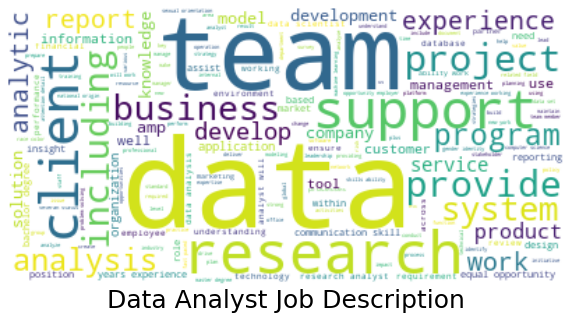

In [0]:
# data analyst job
text = ''
for w in analyst_job ['description'].str.lower():
    text = text + str(w)


# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Data Analyst Job Description", size = 25,y=-0.1)
plt.axis("off")
plt.show()

### Data Engineer

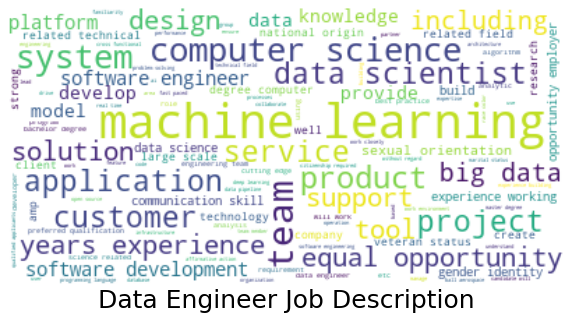

In [0]:
text = ''
for w in engineer_job ['description'].str.lower():
    text = text + str(w)


# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Data Engineer Job Description", size = 25,y=-0.1)
plt.axis("off")
plt.show()

### Manager

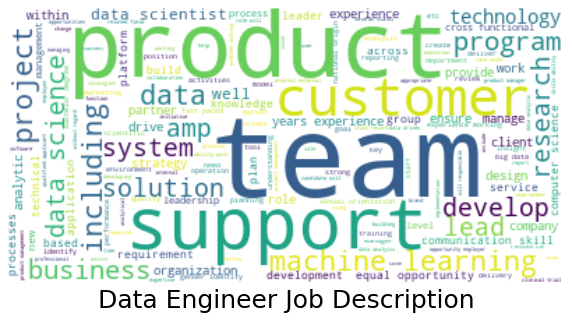

In [0]:
text = ''
for w in manager_job ['description'].str.lower():
    text = text + str(w)


# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Data Engineer Job Description", size = 25,y=-0.1)
plt.axis("off")
plt.show()

### Other Job Types

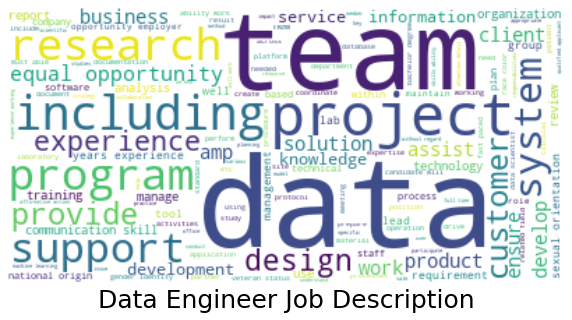

In [0]:
text = ''
for w in other_job ['description'].str.lower():
    text = text + str(w)


# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Data Engineer Job Description", size = 25,y=-0.1)
plt.axis("off")
plt.show()

#N-gram

In [0]:
#ngram function
def ngram_extractor(text, n_gram):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# Function to generate a dataframe with n_gram and top max_row frequencies
def generate_ngrams(df, n_gram, max_row):
    temp_dict = defaultdict(int)
    for question in df:
        for word in ngram_extractor(question, n_gram):
            temp_dict[word] += 1
    temp_df = pd.DataFrame(sorted(temp_dict.items(), key=lambda x: x[1])[::-1]).head(max_row)
    temp_df.columns = ["word", "wordcount"]
    return temp_df

#Function to construct side by side comparison plots
def comparison_plot(df_1,df_2,col_1,col_2, space):
    fig, ax = plt.subplots(1, 2, figsize=(20,10))
    
    sns.barplot(x=col_2, y=col_1, data=df_1, ax=ax[0], color="royalblue")
    sns.barplot(x=col_2, y=col_1, data=df_2, ax=ax[1], color="royalblue")

    ax[0].set_xlabel('Word count', size=14)
    ax[0].set_ylabel('Words', size=14)
    ax[0].set_title('Top 10 Bi-grams in Descriptions', size=18)

    ax[1].set_xlabel('Word count', size=14)
    ax[1].set_ylabel('Words', size=14)
    ax[1].set_title('Top 10 Tri-grams in Descriptions', size=18)

    fig.subplots_adjust(wspace=space)
    
    plt.show()

### Data Scientist

In [0]:
scientist_desc = scientist_job["description"]
scientist_desc.replace('--', np.nan, inplace=True) 
scientist_desc_na = scientist_desc.dropna()
#convert list elements to lower case
scientist_desc_na_cleaned = [item.lower() for item in scientist_desc_na]
#remove html links from list 
scientist_desc_na_cleaned =  [re.sub(r"http\S+", "", item) for item in scientist_desc_na_cleaned]
#remove special characters left
scientist_desc_na_cleaned = [re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", item) for item in scientist_desc_na_cleaned]
#convert to dataframe
scientist_desc_na_cleaned = pd.DataFrame(np.array(scientist_desc_na_cleaned).reshape(-1))
#Squeeze dataframe to obtain series
scientist_cleaned = scientist_desc_na_cleaned.squeeze()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


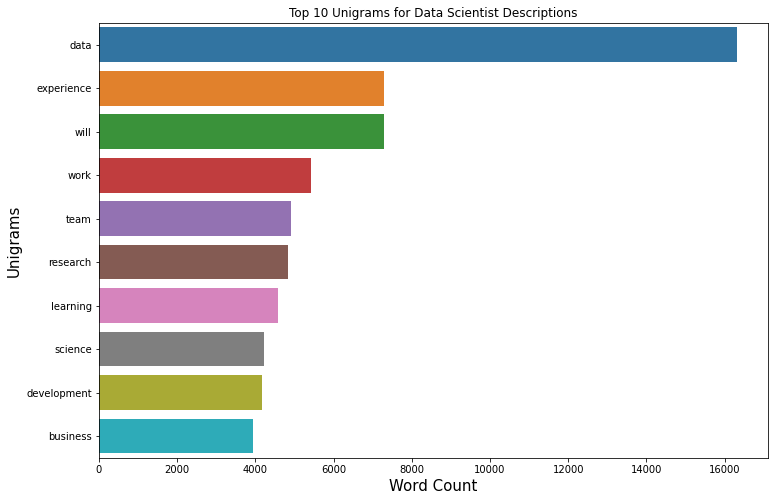

In [0]:
#Generate unigram for data analyst
scientist_1gram = generate_ngrams(scientist_cleaned, 1, 10)
#generate barplot for unigram
plt.figure(figsize=(12,8))
sns.barplot(scientist_1gram["wordcount"],scientist_1gram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Unigrams", fontsize=15)
plt.title("Top 10 Unigrams for Data Scientist Descriptions")
plt.show()

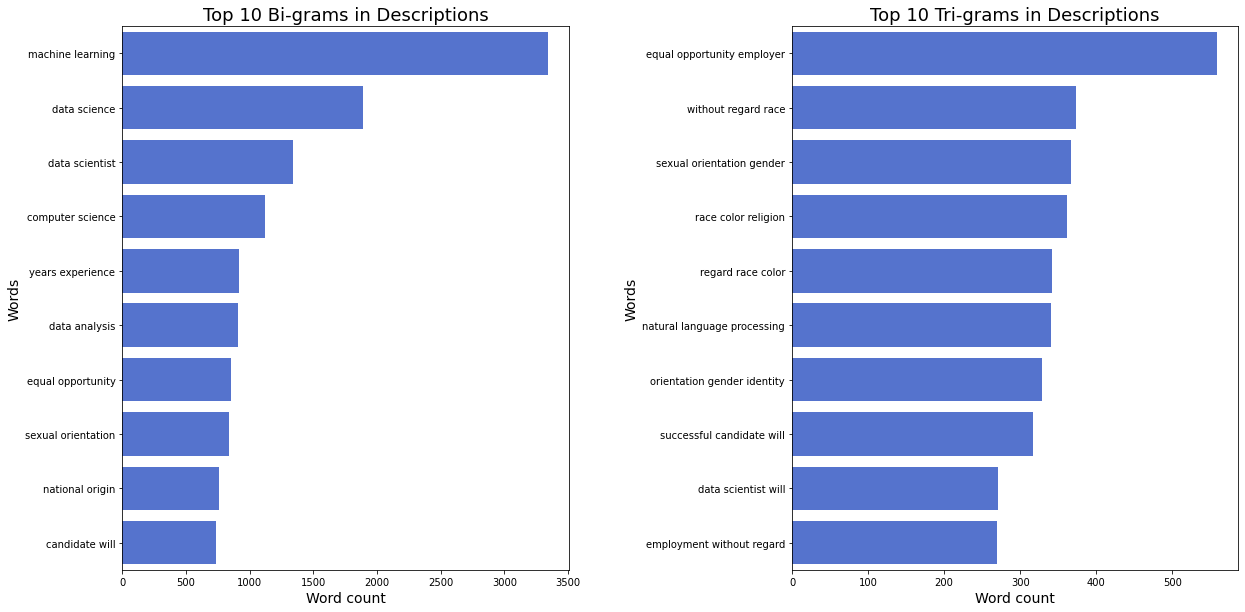

In [0]:
#Obtain bi-grams and tri-grams (top 20)
scientist_2gram = generate_ngrams(scientist_cleaned, 2, 10)
scientist_3gram = generate_ngrams(scientist_cleaned, 3, 10)
#compare the bar plots
comparison_plot(scientist_2gram,scientist_3gram,'word','wordcount', 0.5)

### Data Analyst

In [0]:
Analyst_desc = analyst_job["description"]
Analyst_desc.replace('--', np.nan, inplace=True) 
Analyst_desc_na = Analyst_desc.dropna()
#convert list elements to lower case
Analyst_desc_na_cleaned = [item.lower() for item in Analyst_desc_na]
#remove html links from list 
Analyst_desc_na_cleaned =  [re.sub(r"http\S+", "", item) for item in Analyst_desc_na_cleaned]
#remove special characters left
Analyst_desc_na_cleaned = [re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", item) for item in Analyst_desc_na_cleaned]
#convert to dataframe
Analyst_desc_na_cleaned = pd.DataFrame(np.array(Analyst_desc_na_cleaned).reshape(-1))
#Squeeze dataframe to obtain series
Analyst_cleaned = Analyst_desc_na_cleaned.squeeze()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


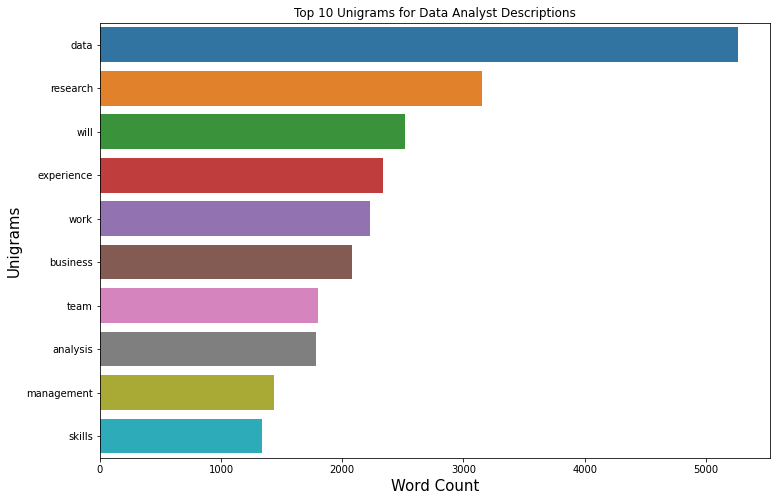

In [0]:
#Generate unigram for data analyst
Analyst_1gram = generate_ngrams(Analyst_cleaned, 1, 10)
#generate barplot for unigram
plt.figure(figsize=(12,8))
sns.barplot(Analyst_1gram["wordcount"],Analyst_1gram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Unigrams", fontsize=15)
plt.title("Top 10 Unigrams for Data Analyst Descriptions")
plt.show()

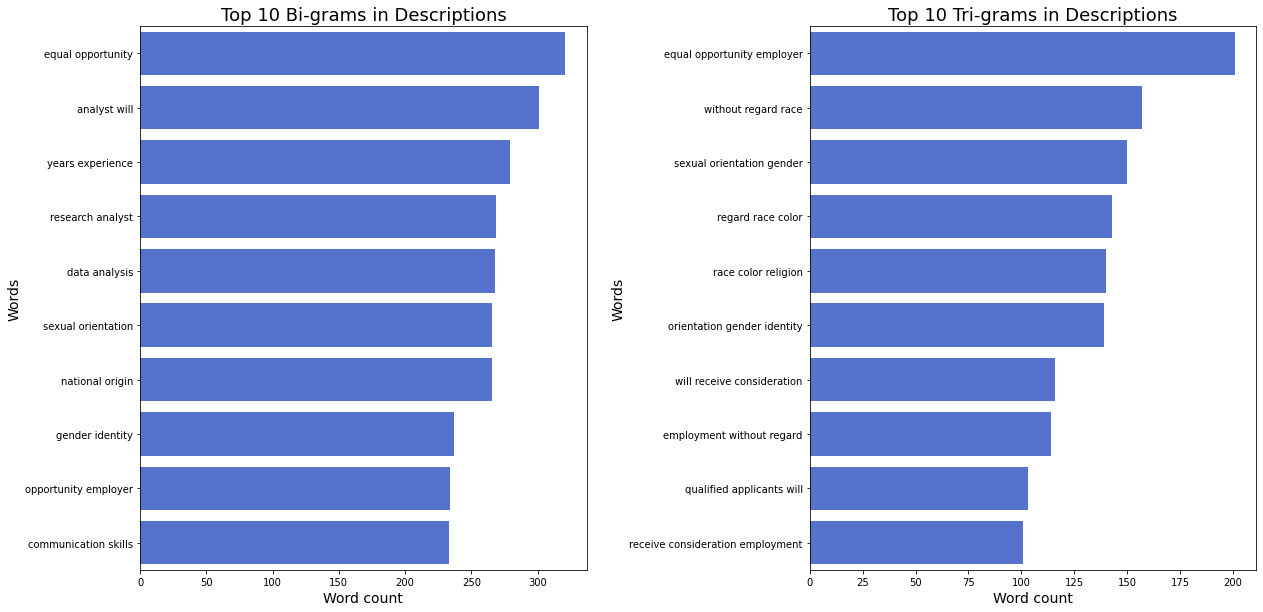

In [0]:
#Obtain bi-grams and tri-grams (top 20)
Analyst_2gram = generate_ngrams(Analyst_cleaned, 2, 10)
Analyst_3gram = generate_ngrams(Analyst_cleaned, 3, 10)
#compare the bar plots
comparison_plot(Analyst_2gram,Analyst_3gram,'word','wordcount', 0.5)

### Data Engineer


In [0]:
scientist_desc = engineer_job["description"]
scientist_desc.replace('--', np.nan, inplace=True) 
scientist_desc_na = scientist_desc.dropna()
#convert list elements to lower case
scientist_desc_na_cleaned = [item.lower() for item in scientist_desc_na]
#remove html links from list 
scientist_desc_na_cleaned =  [re.sub(r"http\S+", "", item) for item in scientist_desc_na_cleaned]
#remove special characters left
scientist_desc_na_cleaned = [re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", item) for item in scientist_desc_na_cleaned]
#convert to dataframe
scientist_desc_na_cleaned = pd.DataFrame(np.array(scientist_desc_na_cleaned).reshape(-1))
#Squeeze dataframe to obtain series
scientist_cleaned = scientist_desc_na_cleaned.squeeze()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


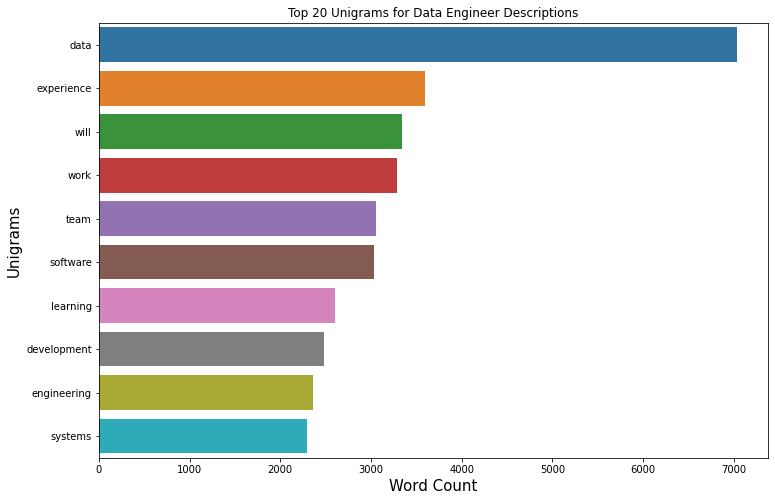

In [0]:
#Generate unigram for data analyst
engineer_1gram = generate_ngrams(scientist_cleaned, 1, 10)
#generate barplot for unigram
plt.figure(figsize=(12,8))
sns.barplot(engineer_1gram["wordcount"],engineer_1gram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Unigrams", fontsize=15)
plt.title("Top 20 Unigrams for Data Engineer Descriptions")
plt.show()

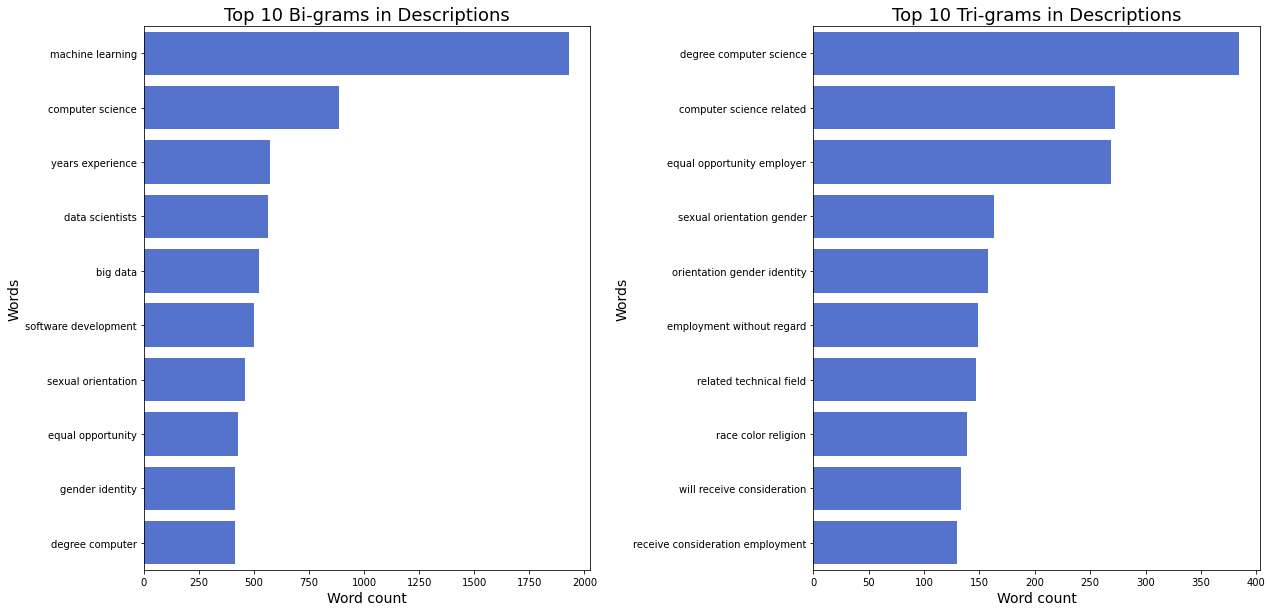

In [0]:
#Obtain bi-grams and tri-grams (top 20)
engineer_2gram = generate_ngrams(scientist_cleaned, 2, 10)
engineer_3gram = generate_ngrams(scientist_cleaned, 3, 10)
#compare the bar plots
comparison_plot(engineer_2gram,engineer_3gram,'word','wordcount', 0.5)

## Compare Table


In [0]:
t1=pd.concat([scientist_1gram['word'],Analyst_1gram['word'],engineer_1gram['word']], axis=1)
t1.columns=['Data Scientist','Data Analyst','Data Engineer']
t1

,Data Scientist,Data Analyst,Data Engineer
0,data,data,data
1,experience,research,experience
2,will,will,will
3,work,experience,work
4,team,work,team
5,research,business,software
6,learning,team,learning
7,science,analysis,development
8,development,management,engineering
9,business,skills,systems


In [0]:
t2=pd.concat([scientist_2gram['word'],Analyst_2gram['word'],engineer_2gram['word']], axis=1)
t2.columns=['Data Scientist','Data Analyst','Data Engineer']
t2

,Data Scientist,Data Analyst,Data Engineer
0,machine learning,equal opportunity,machine learning
1,data science,analyst will,computer science
2,data scientist,years experience,years experience
3,computer science,research analyst,data scientists
4,years experience,data analysis,big data
5,data analysis,sexual orientation,software development
6,equal opportunity,national origin,sexual orientation
7,sexual orientation,gender identity,equal opportunity
8,national origin,opportunity employer,gender identity
9,candidate will,communication skills,degree computer


In [0]:
t3=pd.concat([scientist_3gram['word'],Analyst_3gram['word'],engineer_3gram['word']], axis=1)
t3.columns=['Data Scientist','Data Analyst','Data Engineer']
t3

,Data Scientist,Data Analyst,Data Engineer
0,equal opportunity employer,equal opportunity employer,degree computer science
1,without regard race,without regard race,computer science related
2,sexual orientation gender,sexual orientation gender,equal opportunity employer
3,race color religion,regard race color,sexual orientation gender
4,regard race color,race color religion,orientation gender identity
5,natural language processing,orientation gender identity,employment without regard
6,orientation gender identity,will receive consideration,related technical field
7,successful candidate will,employment without regard,race color religion
8,data scientist will,qualified applicants will,will receive consideration
9,employment without regard,receive consideration employment,receive consideration employment


#Language


### Data Scientist

In [0]:
sc_des=data[data['position_type'] == 'Data Scientist']
sc_des['description']=sc_des['description'].str.lower()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
sp=sc_des[sc_des['description'].str.contains(r"\b(?:python)\b")]

# percentage of python mentioned in description
spp=sp.shape[0]/sc_des.shape[0]*100
spp

53.286297809134794

In [0]:
sr=sc_des[sc_des['description'].str.contains(r"\b(?:r)\b")]

# percentage of r mentioned in description
srp=sr.shape[0]/sc_des.shape[0]*100
srp

45.04270330486446

In [0]:
ssql=sc_des[sc_des['description'].str.contains(r'\b(?:sql|mysql)\b')]

# percentage of sql mentioned in description
ssqlp=ssql.shape[0]/sc_des.shape[0]*100
ssqlp

29.966580022279988

In [0]:
sj=sc_des[sc_des['description'].str.contains(r"\b(?:java)\b")]

# percentage of tableau mentioned in description
sjp=sj.shape[0]/sc_des.shape[0]*100
sjp

18.64092090605273

In [0]:
sc=sc_des[sc_des['description'].str.contains(r'\bc\+\+(?!\w)|\b(?:c)\b')]

scp=sc.shape[0]/sc_des.shape[0]*100
scp

19.754920163386558

In [0]:
st=sc_des[sc_des['description'].str.contains(r"\b(?:tableau)\b")]

# percentage of tableau mentioned in description
stp=st.shape[0]/sc_des.shape[0]*100
stp

7.649461567025622

In [0]:
se=sc_des[sc_des['description'].str.contains(r"\b(?:excel)\b")]

sep=se.shape[0]/sc_des.shape[0]*100
sep

8.50352766431489

In [0]:
sm=sc_des[sc_des['description'].str.contains(r"\b(?:matlab)\b")]

# percentage of master mentioned in description
smp=sm.shape[0]/sc_des.shape[0]*100
smp

10.434459710360192

In [0]:
da = {'Data Scientist':[spp, srp, ssqlp, sjp,scp,stp,sep,smp]} 
  
# Creates pandas DataFrame. 
sskill = pd.DataFrame(da, index =['Python', 'R', 'SQL', 'Java','C/C++','Tableau','Excel','Matlab']) 
#sskill['Data Scientist']=pd.Series(["{0:.2f}%".format(val) for val in sskill['Data Scientist']],index=sskill.index)

## Data Analyst

In [0]:
an_des = data[data['position_type'] == 'Data Analyst']
an_des['description']=an_des['description'].str.lower()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
ap=an_des[an_des['description'].str.contains(r"\b(?:python)\b")]

# percentage of python mentioned in description
app=ap.shape[0]/an_des.shape[0]*100
app

29.1044776119403

In [0]:
ar=an_des[an_des['description'].str.contains(r"\b(?:r)\b")]

# percentage of r mentioned in description
arp=ar.shape[0]/an_des.shape[0]*100
arp

33.582089552238806

In [0]:
asql=an_des[an_des['description'].str.contains(r"\b(?:sql|mysql)\b")]

# percentage of python mentioned in description
asqlp=asql.shape[0]/an_des.shape[0]*100
asqlp

34.54157782515991

In [0]:
aj=an_des[an_des['description'].str.contains(r"\b(?:java)\b")]

# percentage of python mentioned in description
ajp=aj.shape[0]/an_des.shape[0]*100
ajp

7.569296375266525

In [0]:
ac=an_des[an_des['description'].str.contains(r'\bc\+\+(?!\w)|\b(?:c)\b')]

acp=ac.shape[0]/an_des.shape[0]*100
acp

12.153518123667377

In [0]:
at=an_des[an_des['description'].str.contains(r"\b(?:tableau)\b")]

# percentage of python mentioned in description
atp=at.shape[0]/an_des.shape[0]*100
atp

14.818763326226012

In [0]:
ae=an_des[an_des['description'].str.contains(r"\b(?:excel)\b")]

# percentage of python mentioned in description
aep=ae.shape[0]/an_des.shape[0]*100
aep

37.20682302771855

In [0]:
am=an_des[an_des['description'].str.contains(r"\b(?:matlab)\b")]

# percentage of master mentioned in description
amp=am.shape[0]/an_des.shape[0]*100
amp

6.7164179104477615

In [0]:
da = {'Data Analyst':[app, arp, asqlp, ajp,acp,atp,aep,amp]} 
  
# Creates pandas DataFrame. 
askill = pd.DataFrame(da, index =['Python', 'R', 'SQL', 'Java','C/C++','Tableau','Excel','Matlab']) 
#askill['Data Analyst']=pd.Series(["{0:.2f}%".format(val) for val in askill['Data Analyst']],index=sskill.index)

## Data Engineer

In [0]:
en_des = data[data['position_type'] == 'Data Engineer']
en_des['description']=en_des['description'].str.lower()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
ep=en_des[en_des['description'].str.contains(r"\b(?:python)\b")]

# percentage of python mentioned in description
epp=ep.shape[0]/en_des.shape[0]*100
epp

54.054054054054056

In [0]:
er=en_des[en_des['description'].str.contains(r"\b(?:r)\b")]

# percentage of python mentioned in description
erp=er.shape[0]/en_des.shape[0]*100
erp

17.792792792792792

In [0]:
es=en_des[en_des['description'].str.contains(r"\b(?:sql|mysql)\b")]

# percentage of python mentioned in description
esp=es.shape[0]/en_des.shape[0]*100
esp

27.027027027027028

In [0]:
ej=en_des[en_des['description'].str.contains(r"\b(?:java)\b")]

# percentage of python mentioned in description
ejp=ej.shape[0]/en_des.shape[0]*100
ejp

36.786786786786784

In [0]:
ec=en_des[en_des['description'].str.contains(r'\bc\+\+(?!\w)|\b(?:c)\b')]

ecp=ec.shape[0]/en_des.shape[0]*100
ecp

34.609609609609606

In [0]:
et=en_des[en_des['description'].str.contains(r"\b(?:tableau)\b")]

# percentage of python mentioned in description
etp=et.shape[0]/en_des.shape[0]*100
etp

3.3783783783783785

In [0]:
ee=en_des[en_des['description'].str.contains(r"\b(?:excel)\b")]

eep=ee.shape[0]/en_des.shape[0]*100
eep

5.255255255255255

In [0]:
em=en_des[en_des['description'].str.contains(r"\b(?:matlab)\b")]

# percentage of master mentioned in description
emp=em.shape[0]/en_des.shape[0]*100
emp

8.708708708708707

In [0]:
da = {'Data Engineer':[epp, erp, esp, ejp,ecp,etp,eep,emp]} 
  
# Creates pandas DataFrame. 
eskill = pd.DataFrame(da, index =['Python', 'R', 'SQL', 'Java','C/C++','Tableau','Excel','Matlab']) 
#eskill['Data Engineer']=pd.Series(["{0:.2f}%".format(val) for val in eskill['Data Engineer']],index=sskill.index)

## Compare

In [0]:
t4=pd.concat([sskill,askill,eskill],axis=1)
t4

,Data Scientist,Data Analyst,Data Engineer
Python,53.286298,29.104478,54.054054
R,45.042703,33.582090,17.792793
SQL,29.966580,34.541578,27.027027
Java,18.640921,7.569296,36.786787
C/C++,19.754920,12.153518,34.609610
Tableau,7.649462,14.818763,3.378378
Excel,8.503528,37.206823,5.255255
Matlab,10.434460,6.716418,8.708709


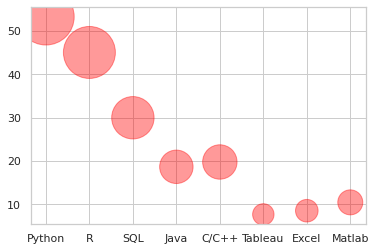

In [0]:
plt.scatter(t4.index, t4['Data Scientist'], s=t4['Data Scientist']*60, c="red", alpha=0.4)

# Skill

### Data Scientist

In [0]:
sb=sc_des[sc_des['description'].str.contains(r"\b(?:bachelor)\b")]

sbp=sb.shape[0]/sc_des.shape[0]*100
sbp

15.670256219829188

In [0]:
sma=sc_des[sc_des['description'].str.contains(r"\b(?:masters?)\b")]

smap=sma.shape[0]/sc_des.shape[0]*100
smap

27.961381359079095

In [0]:
sph=sc_des[sc_des['description'].str.contains(r"\b(?:phd)\b")]

sphp=sph.shape[0]/sc_des.shape[0]*100
sphp

39.32417378388414

In [0]:
#Data Analysis, Data Visualization, Research
sa=sc_des[sc_des['description'].str.contains(r"\b(?:analysis)\b")]
sv=sc_des[sc_des['description'].str.contains(r"\b(?:visualization)\b")]
srr=sc_des[sc_des['description'].str.contains(r"\b(?:research)\b")]

sap=(sa.shape[0]+sv.shape[0]+srr.shape[0])/sc_des.shape[0]*100
sap

142.8147047901968

In [0]:
#Mahine Learning, Modeling, Statistical Analysis
smm=sc_des[sc_des['description'].str.contains(r"\b(?:machine learning)\b")]
smo=sc_des[sc_des['description'].str.contains(r"\b(?:modeling)\b")]
ss=sc_des[sc_des['description'].str.contains(r"\b(?:statistical)\b")]

smop=(smm.shape[0]+smo.shape[0]+ss.shape[0])/sc_des.shape[0]*100
smop

124.5822502784998

In [0]:
da = {'Data Scientist':[sap,smop,sbp,smap,sphp]} 
  
# Creates pandas DataFrame. 
ssk = pd.DataFrame(da, index =["A","B","bachelor",'master','phd']) 
#ssk['Data Scientist']=pd.Series(["{0:.2f}%".format(val) for val in ssk['Data Scientist']],index=ssk.index)

## Data Analyst

In [0]:
ab=an_des[an_des['description'].str.contains(r"\b(?:bachelor)\b")]

abp=ab.shape[0]/an_des.shape[0]*100
abp

42.53731343283582

In [0]:
ama=an_des[an_des['description'].str.contains(r"\b(?:masters?)\b")]

# percentage of master mentioned in description
amap=ama.shape[0]/an_des.shape[0]*100
amap

29.21108742004264

In [0]:
aph=an_des[an_des['description'].str.contains(r"\b(?:phd)\b")]

# percentage of master mentioned in description
aphp=aph.shape[0]/an_des.shape[0]*100
aphp

8.528784648187633

In [0]:
aa=an_des[an_des['description'].str.contains(r"\b(?:analysis)\b")]
av=an_des[an_des['description'].str.contains(r"\b(?:visualization)\b")]
arr=an_des[an_des['description'].str.contains(r"\b(?:research)\b")]

aap=(aa.shape[0]+av.shape[0]+arr.shape[0])/an_des.shape[0]*100
aap

157.35607675906184

In [0]:
amm=an_des[an_des['description'].str.contains(r"\b(?:machine learning)\b")]
amo=an_des[an_des['description'].str.contains(r"\b(?:modeling)\b")]
ass=an_des[an_des['description'].str.contains(r"\b(?:statistical)\b")]

amop=(amm.shape[0]+amo.shape[0]+ass.shape[0])/an_des.shape[0]*100
amop

71.42857142857143

In [0]:
da = {'Data Analyst':[aap,amop,abp,amap,aphp]} 
  
# Creates pandas DataFrame. 
ask = pd.DataFrame(da, index =['A','B',"bachelor",'master','phd']) 
#ask['Data Analyst']=pd.Series(["{0:.2f}%".format(val) for val in ask['Data Analyst']],index=ask.index)

## Data Engineer

In [0]:
eb=en_des[en_des['description'].str.contains(r"\b(?:bachelor)\b")]

# percentage of master mentioned in description
ebp=eb.shape[0]/en_des.shape[0]*100
ebp

29.204204204204203

In [0]:
ema=en_des[en_des['description'].str.contains(r"\b(?:masters?)\b")]

# percentage of master mentioned in description
emap=ema.shape[0]/en_des.shape[0]*100
emap

29.954954954954953

In [0]:
eph=en_des[en_des['description'].str.contains(r"\b(?:phd)\b")]

# percentage of master mentioned in description
ephp=eph.shape[0]/en_des.shape[0]*100
ephp

16.29129129129129

In [0]:
ea=en_des[en_des['description'].str.contains(r"\b(?:analysis)\b")]
ev=en_des[en_des['description'].str.contains(r"\b(?:visualization)\b")]
err=en_des[en_des['description'].str.contains(r"\b(?:research)\b")]

eap=(ea.shape[0]+ev.shape[0]+err.shape[0])/en_des.shape[0]*100
eap

91.74174174174175

In [0]:
emm=en_des[en_des['description'].str.contains(r"\b(?:machine learning)\b")]
emo=en_des[en_des['description'].str.contains(r"\b(?:modeling)\b")]
es=en_des[en_des['description'].str.contains(r"\b(?:statistical)\b")]

emop=(emm.shape[0]+emo.shape[0]+es.shape[0])/en_des.shape[0]*100
emop

76.27627627627628

In [0]:
da = {'Data Engineer':[eap,emop,ebp,emap,ephp]} 
  
# Creates pandas DataFrame. 
esk = pd.DataFrame(da, index =['A','B',"bachelor",'master','phd']) 
#esk['Data Engineer']=pd.Series(["{0:.2f}%".format(val) for val in esk['Data Engineer']],index=esk.index)

## Compare

In [0]:
t5=pd.concat([ssk,ask,esk],axis=1)
t5=t5.transpose().reset_index()
t5=t5.rename(columns={"index":"type"})
t5

,type,A,B,bachelor,master,phd
0,Data Scientist,142.814705,124.582250,15.670256,15.670256,39.324174
1,Data Analyst,157.356077,71.428571,42.537313,42.537313,8.528785
2,Data Engineer,91.741742,76.276276,29.204204,29.204204,16.291291


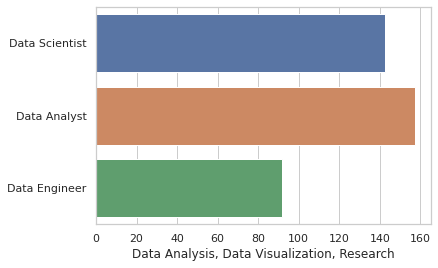

In [0]:
sns.set(style="whitegrid")
s1=sns.barplot(y = 'type', x = 'A', data =t5)
s1.set_xlabel('Data Analysis, Data Visualization, Research')
s1.set_ylabel('') 
plt.show()

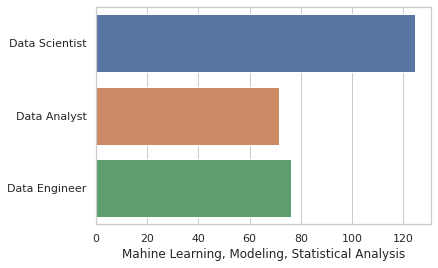

In [0]:
sns.set(style="whitegrid")
s2=sns.barplot(y = 'type', x = 'B', data =t5)
s2.set_xlabel('Mahine Learning, Modeling, Statistical Analysis')
s2.set_ylabel('') 
plt.show()

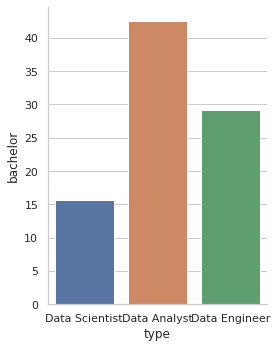

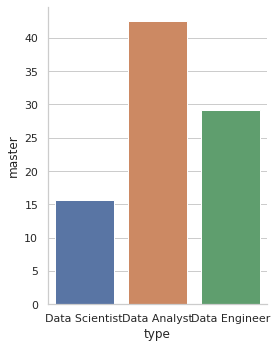

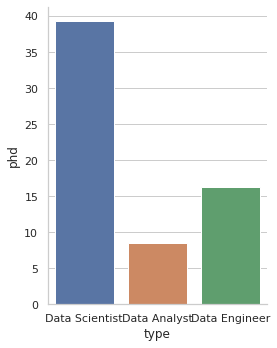

In [0]:
sns.set(style="whitegrid")
sns.catplot(y='bachelor',x='type',kind='bar',height=5, aspect=0.8,data =t5)
sns.catplot(y='master',x='type',kind='bar',height=5, aspect=0.8,data =t5)
sns.catplot(y='phd',x='type',kind='bar',height=5, aspect=0.8,data =t5)

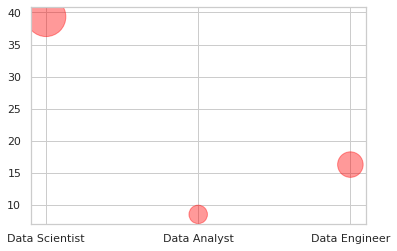

In [0]:
plt.scatter(t5.type, t5.phd, s=t5.phd*40, c="red", alpha=0.4)
